In [29]:
import pandas as pd
import numpy as np
import json
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline
plt.style.use('ggplot')

In [2]:
chunks = pd.read_json('data/review.json', lines=True, chunksize = 10000)

In [3]:
for c in chunks:
    chunk = c
    break

In [4]:
chunk

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,xQY8N_XvtGbearJ5X4QryQ,OwjRMXRC0KyPrIlcjaXeFQ,-MhfebM0QIsKt87iDN-FNw,2,5,0,0,"As someone who has worked with many museums, I...",2015-04-15 05:21:16
1,UmFMZ8PyXZTY2QcwzsfQYA,nIJD_7ZXHq-FX8byPMOkMQ,lbrU8StCq3yDfr-QMnGrmQ,1,1,1,0,I am actually horrified this place is still in...,2013-12-07 03:16:52
2,LG2ZaYiOgpr2DK_90pYjNw,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,5,1,0,0,I love Deagan's. I do. I really do. The atmosp...,2015-12-05 03:18:11
3,i6g_oA9Yf9Y31qt0wibXpw,ofKDkJKXSKZXu5xJNGiiBQ,5JxlZaqCnk1MnbgRirs40Q,1,0,0,0,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",2011-05-27 05:30:52
4,6TdNDKywdbjoTkizeMce8A,UgMW8bLE0QMJDCkQ1Ax5Mg,IS4cv902ykd8wj1TR0N3-A,4,0,0,0,"Oh happy day, finally have a Canes near my cas...",2017-01-14 21:56:57
...,...,...,...,...,...,...,...,...,...
9995,PxLgGV56Hw4txlG6gKvapQ,1IyGLnESYghXsScyn3ltNA,z2JTN5PXemCRGtGbKiOvZw,1,1,0,0,I came here to get a pedicure. Worst experienc...,2015-10-07 23:45:05
9996,3ykur79WxV27JxgIeaUyEw,IivADm5_qbGHYJvxPDDdLA,Jt28TYWanzKrJYYr0Tf1MQ,5,0,0,0,Excellent service and excellent food! We ate b...,2017-06-17 18:25:56
9997,q7vcvqY434k_Rw3X0eEk_g,5-U7VLg1OtAXLGY57npZLQ,90oH6tilpqsCkz7Dhcxejw,5,0,0,0,In line with and one of the best massages I ha...,2018-05-08 18:48:16
9998,hd6KRCmVtFqwGluq3D3Nsw,9TNITWe9p-7qCdyAC0u5Nw,9IdnNV6Rq1ddFyWMdyAKrQ,5,1,0,1,Virginia has been our vet for 6 years. She has...,2014-09-25 16:57:16


In [5]:
chunk['review_id'][0] == 'xQY8N_XvtGbearJ5X4QryQ'

True

In [6]:
chunk['stars'].describe()

count    10000.000000
mean         3.733900
std          1.441284
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: stars, dtype: float64

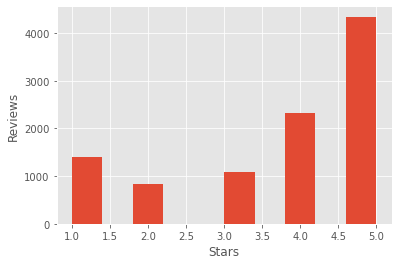

In [32]:
plt.hist(y)
plt.ylabel('Reviews')
plt.xlabel('Stars')
plt.show()

In [12]:
corpus = chunk['text'].tolist()

In [10]:
vectorizer = TfidfVectorizer(strip_accents='ascii', stop_words='english')

In [13]:
X = vectorizer.fit_transform(corpus)

In [14]:
y = chunk['stars']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [20]:
rf = RandomForestClassifier(n_jobs=-1)

In [21]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [22]:
rf.score(X_test, y_test)

0.5644

In [25]:
rfpred = rf.predict(X_test)

In [26]:
residual = rfpred - y_test

Text(0.5, 0, 'Score')

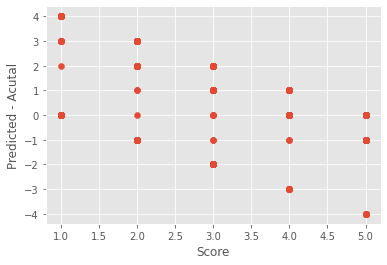

In [30]:
plt.scatter(y_test, residual)
plt.ylabel('Predicted - Acutal')
plt.xlabel('Score')

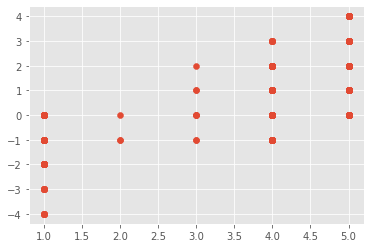

In [31]:
plt.scatter(rfpred, residual)

In [34]:
len(rf.feature_importances_)

25730